In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

med_clm_data_1 = pd.read_csv("Medicare_Claims_data_part_1.csv")
med_clm_data_2 = pd.read_csv("Medicare_Claims_data_part_2.csv")
med_clm_data_3 = pd.read_csv("Medicare_Claims_data_part_3.csv")
med_clm_data_4 = pd.read_csv("Medicare_Claims_data_part_4.csv")
med_clm_data_5 = pd.read_csv("Medicare_Claims_data_part_5.csv")

# Merging DataFrames
merged_df = pd.concat([med_clm_data_1, med_clm_data_2, med_clm_data_3, med_clm_data_4, med_clm_data_5], ignore_index=True)

merged_df = merged_df.sort_values(by=['cur_clm_uniq_id'])

# Reset index
merged_df = merged_df.reset_index(drop=True)

print(merged_df)

        cur_clm_uniq_id  bene_mbi_id  fac_prvdr_npi_num clm_from_dt  \
0                100020        10449       7.829223e+09   9/26/2016   
1                100020        10977       7.360579e+09  12/13/2017   
2                100020         1109       1.587946e+09   5/19/2017   
3                100020        10882       1.414857e+09    4/3/2017   
4                100020          963       1.414857e+09   11/3/2018   
...                 ...          ...                ...         ...   
999995          1699222        11825       1.907625e+09   7/11/2018   
999996          1699222        12706       9.487650e+09    4/8/2016   
999997          1699222         1162       2.540069e+09   6/30/2018   
999998          1699222        10053       6.514841e+09  10/30/2018   
999999          1699222        10233       8.063718e+09   10/8/2018   

       clm_thru_dt prncpl_dgns_cd  clm_pmt_amt  clm_mdcr_instnl_tot_chrg_amt  \
0        12/5/2016          Z0289          NaN                     

In [2]:
conditions = (
    (merged_df['clm_line_hcpcs_cd'] == "J1885") |
    (merged_df['clm_line_hcpcs_cd'] == "J3010") |
    (merged_df['clm_line_hcpcs_cd'] == "J2250") |
    (merged_df['clm_line_hcpcs_cd'] == "J2704")
)

filtered_df = merged_df[conditions]

filtered_df.head()

unique_claim_ids = filtered_df['cur_clm_uniq_id'].unique()

final_df = merged_df[merged_df['cur_clm_uniq_id'].isin(unique_claim_ids)]
print(final_df)
final_df.info()

        cur_clm_uniq_id  bene_mbi_id  fac_prvdr_npi_num clm_from_dt  \
0                100020        10449       7.829223e+09   9/26/2016   
1                100020        10977       7.360579e+09  12/13/2017   
2                100020         1109       1.587946e+09   5/19/2017   
3                100020        10882       1.414857e+09    4/3/2017   
4                100020          963       1.414857e+09   11/3/2018   
...                 ...          ...                ...         ...   
999995          1699222        11825       1.907625e+09   7/11/2018   
999996          1699222        12706       9.487650e+09    4/8/2016   
999997          1699222         1162       2.540069e+09   6/30/2018   
999998          1699222        10053       6.514841e+09  10/30/2018   
999999          1699222        10233       8.063718e+09   10/8/2018   

       clm_thru_dt prncpl_dgns_cd  clm_pmt_amt  clm_mdcr_instnl_tot_chrg_amt  \
0        12/5/2016          Z0289          NaN                     

In [3]:
X = final_df['clm_line_hcpcs_cd'] == 'J1885'
count_J1885 = X.sum()
print(f"Number of records with 'J1885': {count_J1885}")


Number of records with 'J1885': 10152


In [4]:
Y = final_df['clm_line_hcpcs_cd'] == 'J2250'
count_J2250 = Y.sum()
print(f"Number of records with 'J2250': {count_J2250}")

Number of records with 'J2250': 1148


In [5]:
Z = final_df['clm_line_hcpcs_cd'] == 'J3010'
count_J3010 = Z.sum()
print(f"Number of records with 'J3010': {count_J3010}")

Number of records with 'J3010': 3264


In [6]:
A = final_df['clm_line_hcpcs_cd'] == 'J2704'
count_J2704 = A.sum()
print(f"Number of records with 'J2704': {count_J2704}")

Number of records with 'J2704': 704


In [7]:
med_clm_df = final_df[['cur_clm_uniq_id','bene_mbi_id','fac_prvdr_npi_num','clm_from_dt','clm_dgns_cd','clm_line_hcpcs_cd']]

In [8]:
#check and remove duplicates
med_clm_df.drop_duplicates()

#rename columns
med_clm_df = med_clm_df.rename(columns=
{
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'Patient_id',
        'fac_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_dgns_cd': 'diagnosis_code',
        'clm_line_hcpcs_cd':'product_code'
}                              
)

med_clm_df['claim_id'].nunique()

15145

In [9]:
pt_dem_df = pd.read_csv("Patient_demographics_data.csv")
pt_dem_df.head()

,Patient_id,Age,Gender
0,10,71,Male
1,11,56,Male
2,12,65,Female
3,13,72,Female
4,14,77,Female


In [10]:
med_clm_pt_df = pd.merge(
    med_clm_df,
    pt_dem_df,
    on='Patient_id', how = 'left'
)
med_clm_pt_df

,claim_id,Patient_id,npi_id,claim_date,diagnosis_code,product_code,Age,Gender
0,100020,10449,7.829223e+09,9/26/2016,I10,88307,76,Male
1,100020,10977,7.360579e+09,12/13/2017,I10,Q0092,86,Female
2,100020,1109,1.587946e+09,5/19/2017,I4891,86141,78,Female
3,100020,10882,1.414857e+09,4/3/2017,I10,93296,60,Male
4,100020,963,1.414857e+09,11/3/2018,I10,99152,72,Male
...,...,...,...,...,...,...,...,...
28363,1699222,11825,1.907625e+09,7/11/2018,I10,G0300,70,Female
28364,1699222,12706,9.487650e+09,4/8/2016,Z87891,36415,90,Female
28365,1699222,1162,2.540069e+09,6/30/2018,I10,84439,22,Male
28366,1699222,10053,6.514841e+09,10/30/2018,I10,85027,64,Female


In [11]:
hcp_dem_df = pd.read_csv("HCP_demographics_data.csv")
hcp_dem_df.head()

,HCP NPI ID,Address,City,State,ZIP Code,Specialty
0,8386928704,322 Roberts Drive Suite 888,South Shannonton,AS,67431,Neurology
1,3688956922,11734 Deanna Groves Suite 031,Leviburgh,OK,12405,Anesthesiology
2,5134290518,18686 Schwartz Streets,Shepherdstad,RI,97054,Neurology
3,6740392080,410 Woodard Drive Suite 766,East Calvinmouth,MA,92138,Gastroenterology
4,1178012810,83203 Jimenez Village Apt. 548,Griffinchester,WY,48202,Anesthesiology


In [12]:
hcp_dem_df = hcp_dem_df.rename(columns=
{
        'HCP NPI ID': 'npi_id',
        'ZIP Code': 'Zip Code'
}                              
)
hcp_dem_df.head()

hcp_dem_df['Zip Code'] = hcp_dem_df['Zip Code'].astype(str)

# Function to adjust the zip codes
def adjust_zip(zip_code):
    if len(zip_code) < 5:
        return '0' * (5 - len(zip_code)) + zip_code
    else:
        return zip_code

# Applying the function to the 'Zip Code' column
hcp_dem_df['Zip Code'] = hcp_dem_df['Zip Code'].apply(adjust_zip)
hcp_dem_df.head()

,npi_id,Address,City,State,Zip Code,Specialty
0,8386928704,322 Roberts Drive Suite 888,South Shannonton,AS,67431,Neurology
1,3688956922,11734 Deanna Groves Suite 031,Leviburgh,OK,12405,Anesthesiology
2,5134290518,18686 Schwartz Streets,Shepherdstad,RI,97054,Neurology
3,6740392080,410 Woodard Drive Suite 766,East Calvinmouth,MA,92138,Gastroenterology
4,1178012810,83203 Jimenez Village Apt. 548,Griffinchester,WY,48202,Anesthesiology


In [13]:
# Read the CSV file into a DataFrame
zip_df = pd.read_csv("Zip_to_Territory_Mapping.csv")

# Convert 'Zip Code' column to string type
zip_df['Zip Code'] = zip_df['Zip Code'].astype(str)

# Function to adjust the zip codes
def adjust_zip(zip_code):
    if len(zip_code) < 5:
        return '0' * (5 - len(zip_code)) + zip_code
    else:
        return zip_code

# Applying the function to the 'Zip Code' column
zip_df['Zip Code'] = zip_df['Zip Code'].apply(adjust_zip)

# Display the modified DataFrame
print(zip_df.head())

  Zip Code Territory Name Region Name
0    00501   St Louis, MO     Midwest
1    00544   St Louis, MO     Midwest
2    00601   St Louis, MO     Midwest
3    00602   St Louis, MO     Midwest
4    00603   St Louis, MO     Midwest


In [48]:
# Merging dataframe

hcp_dem_zip_df = pd.merge(
    hcp_dem_df,
    zip_df,
    on='Zip Code', how = 'left'
)
hcp_dem_zip_df

hcp_dem_zip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   npi_id          2000 non-null   int64 
 1   Address         2000 non-null   object
 2   City            2000 non-null   object
 3   State           2000 non-null   object
 4   Zip Code        2000 non-null   object
 5   Specialty       2000 non-null   object
 6   Territory Name  2000 non-null   object
 7   Region Name     2000 non-null   object
dtypes: int64(1), object(7)
memory usage: 125.1+ KB


In [15]:
med_clm_pt_hcp_df = pd.merge(
    med_clm_pt_df,
    hcp_dem_zip_df,
    on='npi_id', how = 'left'
)
med_clm_pt_hcp_df

B = med_clm_pt_hcp_df['product_code'] == 'J1885'
count_J1885 = B.sum()
print(f"Number of records with 'J1885': {count_J1885}")


Number of records with 'J1885': 10152


In [16]:
dig_cod_df = pd.read_csv('Diagnosis_Code_Mapping.csv')
dig_cod_df = dig_cod_df.rename(columns=
{
        'Diagnosis Code Market': 'diagnosis_code_initials'
}                              
)


dig_cod_df.head()


,diagnosis_code_initials,Specialty
0,A,Infectious and Parasitic Diseases
1,B,Infectious and Parasitic Diseases
2,C,Neoplasms
3,D,"Neoplasms, Blood, Blood-forming Organs"
4,E,"Endocrine, Nutritional, Metabolic"


In [17]:
med_clm_pt_hcp_df['diagnosis_code_initials'] = med_clm_pt_hcp_df['diagnosis_code'].str[0]
med_clm_pt_hcp_df.head()

,claim_id,Patient_id,npi_id,claim_date,diagnosis_code,product_code,Age,Gender,Address,City,State,Zip Code,Specialty,Territory Name,Region Name,diagnosis_code_initials
0,100020,10449,7.829223e+09,9/26/2016,I10,88307,76,Male,224 Teresa Mills Suite 159,Campbellmouth,MS,09277,Gastroenterology,"Washington, D.C.",Northeast,I
1,100020,10977,7.360579e+09,12/13/2017,I10,Q0092,86,Female,1559 Sarah Springs Suite 587,North Jessicaborough,WI,63021,Orthopedics,"New York, NY",Northeast,I
2,100020,1109,1.587946e+09,5/19/2017,I4891,86141,78,Female,8979 Mason Common Suite 166,South Jennifershire,CO,78837,Orthopedics,"Charlotte, NC",Southeast,I
3,100020,10882,1.414857e+09,4/3/2017,I10,93296,60,Male,8562 Reynolds Motorway Apt. 414,Amandamouth,AS,97291,Neurology,"Seattle, WA",West,I
4,100020,963,1.414857e+09,11/3/2018,I10,99152,72,Male,8562 Reynolds Motorway Apt. 414,Amandamouth,AS,97291,Neurology,"Seattle, WA",West,I


In [18]:
med_clm_pt_hcp_dig_df = pd.merge(
    med_clm_pt_hcp_df,
    dig_cod_df,
    on='diagnosis_code_initials', how = 'left'
)
med_clm_pt_hcp_dig_df

med_clm_pt_hcp_dig_df.to_excel('med_clm_pt_hcp_dig_df.xlsx', index=False)

In [19]:
med_clm_pt_hcp_dig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28368 entries, 0 to 28367
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_id                 28368 non-null  int64  
 1   Patient_id               28368 non-null  int64  
 2   npi_id                   28368 non-null  float64
 3   claim_date               28368 non-null  object 
 4   diagnosis_code           28368 non-null  object 
 5   product_code             28269 non-null  object 
 6   Age                      28368 non-null  int64  
 7   Gender                   28368 non-null  object 
 8   Address                  28368 non-null  object 
 9   City                     28368 non-null  object 
 10  State                    28368 non-null  object 
 11  Zip Code                 28368 non-null  object 
 12  Specialty_x              28368 non-null  object 
 13  Territory Name           28368 non-null  object 
 14  Region Name           

In [20]:
med_clm_pt_hcp_dig_df = med_clm_pt_hcp_dig_df.rename(columns={
    'Specialty_x': 'speciality_hcp',
    'Specialty_y': 'speciality_diagnosis_code'
})

med_clm_pt_hcp_dig_df.head()

med_clm_pt_hcp_dig_df['npi_id'].nunique()

499

In [21]:
# Filter data for the specified years and procedure codes
prod_codes = ['J1885', 'J3010', 'J2250', 'J2704']
years_range = [2016, 2017, 2018]

# Convert 'claim_date' column to datetime
med_clm_pt_hcp_dig_df['claim_date'] = pd.to_datetime(med_clm_pt_hcp_dig_df['claim_date'])

# Filter data based on specified years and procedure codes
filtered_df = med_clm_pt_hcp_dig_df[
    (med_clm_pt_hcp_dig_df['product_code'].isin(prod_codes)) &
    (med_clm_pt_hcp_dig_df['claim_date'].dt.year.isin(years_range))
]

# Define product code names
product_names = {
    'J1885': 'Ketorolac Tromethamine',
    'J2250': 'Midazolam Hydrochloride',
    'J3010': 'Fentanyl Citrate',
    'J2704': 'Propofol'
}

# Convert claim_date to datetime to extract the year
filtered_df['year'] = filtered_df['claim_date'].dt.year

# Group data by year and procedure_code, count number of claims
grouped_data = filtered_df.groupby(['year', 'product_code']).size().reset_index(name='num_claims')

# Pivot the data to have procedure_code as columns and years as indices
pivot_data = grouped_data.pivot(index='year', columns='product_code', values='num_claims')
pivot_data = pivot_data.fillna(0)

# Calculate share of claims for each procedure code per year
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Rename columns to product names
pivot_data_percentage.rename(columns=product_names, inplace=True)

print(pivot_data_percentage)

product_code  Ketorolac Tromethamine  Midazolam Hydrochloride  Propofol  \
year                                                                      
2016                       73.806180                10.042135  1.896067   
2017                       68.552876                 7.736549  4.397032   
2018                       58.910714                 5.392857  6.892857   

product_code  Fentanyl Citrate  
year                            
2016                 14.255618  
2017                 19.313544  
2018                 28.803571  


/var/folders/y3/r7mxfvgn6ybc5cj3dtdm82jh0000gn/T/ipykernel_47146/3357937676.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['claim_date'].dt.year


In [22]:
pivot_data_percentage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2016 to 2018
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ketorolac Tromethamine   3 non-null      float64
 1   Midazolam Hydrochloride  3 non-null      float64
 2   Propofol                 3 non-null      float64
 3   Fentanyl Citrate         3 non-null      float64
dtypes: float64(4)
memory usage: 108.0 bytes


NameError: name 'plt' is not defined

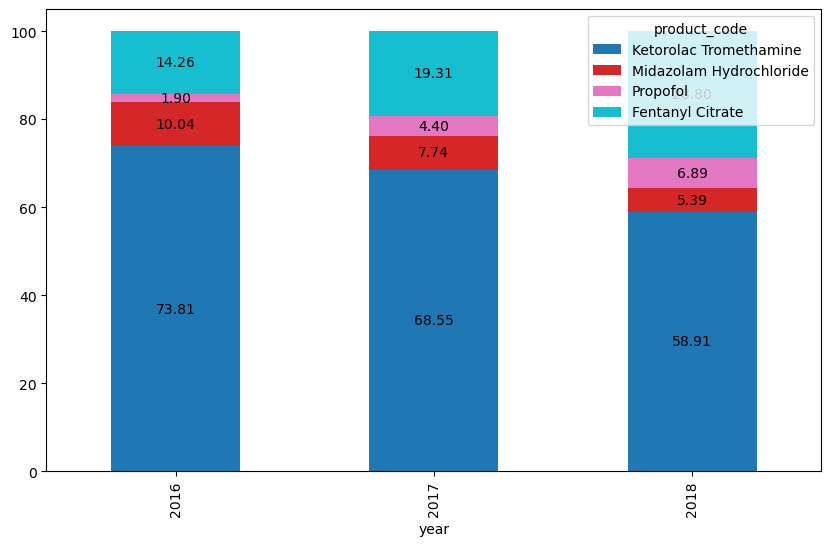

In [23]:
pivot_data_percentage_bar_graph = pivot_data_percentage.plot(
    kind='bar', 
    stacked=True, 
    colormap='tab10', 
    figsize=(10, 6)
)

# Adding rounded data labels
for container in pivot_data_percentage_bar_graph.containers:
    pivot_data_percentage_bar_graph.bar_label(
        container, 
        label_type='center',
        fmt='%.2f'  # Format to display labels with 2 decimal places
    )

plt.title('Share of Patients for Each Product per Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Product Code')
plt.tight_layout()
plt.show()

### Insight

#### Ketotrom: Sustains market leadership but experiences declining market share.​

#### Midoride: Encounters difficulties in capturing market share from its primary brand with declining rate of 30%.​

#### Fenitrate shows consistent increase in claims year over year​

NameError: name 'plt' is not defined

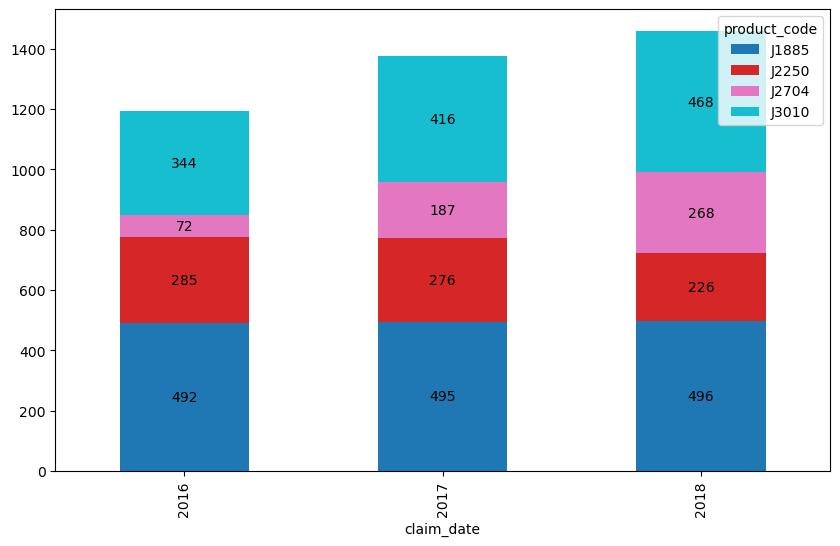

In [24]:
med_clm_pt_hcp_dig_df['claim_date'] = pd.to_datetime(med_clm_pt_hcp_dig_df['claim_date'])

product_codes = ["J1885", "J2250", "J2704", "J3010"]
years = [2016, 2017, 2018]

filtered_df = med_clm_pt_hcp_dig_df[
    (med_clm_pt_hcp_dig_df['product_code'].isin(product_codes)) &
    (med_clm_pt_hcp_dig_df['claim_date'].dt.year.isin(years))
]

# Grouping data by year, product_code, and counting unique NPI IDs
grouped_data = filtered_df.groupby([filtered_df['claim_date'].dt.year, 'product_code'])['npi_id'].nunique().unstack()

# Creating a 100% stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))

# Adding data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.title('Number of HCPs Writing Claims for Each Product per Year')
plt.xlabel('Year')
plt.ylabel('No. of HCP')
plt.legend(title='Product Code')
plt.tight_layout()
plt.show()

### Insight

#### Ketotrom maintains consistent prescriber numbers despite its declining market share.​

#### Fentrirate's impressive growth contrasts with its lower market share, indicating a lower average number of prescriptions.​

#### Midoride, the variant brand, experiences a decline in prescribers across the board.​

NameError: name 'plt' is not defined

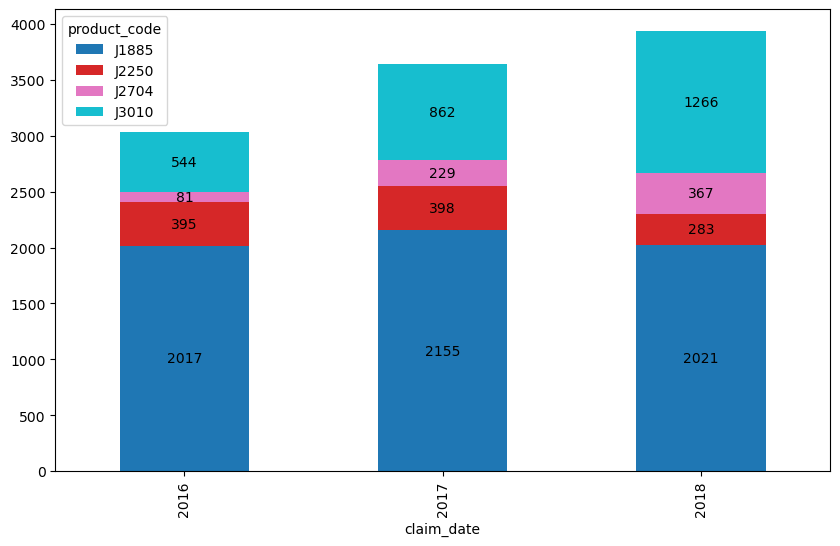

In [25]:
med_clm_pt_hcp_dig_df['claim_date'] = pd.to_datetime(med_clm_pt_hcp_dig_df['claim_date'])

product_codes = ["J1885", "J2250", "J2704", "J3010"]
years = [2016, 2017, 2018]

filtered_df = med_clm_pt_hcp_dig_df[
    (med_clm_pt_hcp_dig_df['product_code'].isin(product_codes)) &
    (med_clm_pt_hcp_dig_df['claim_date'].dt.year.isin(years))
]

# Grouping data by year, product_code, and counting unique patient IDs
grouped_data_patients = filtered_df.groupby([filtered_df['claim_date'].dt.year, 'product_code'])['Patient_id'].nunique().unstack()

# Creating a stacked bar plot for number of patients
ax = grouped_data_patients.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10, 6))

# Adding data labels to each segment
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.title('Number of Patients for Each Product per Year')
plt.xlabel('Year')
plt.ylabel('Number of Patients')
plt.legend(title='Product Code')
plt.tight_layout()
plt.show()

### Insight

#### In comparison to the previous year(2017), the number of patients for the variant brand has decreased by 30%.​

#### Despite losing market share in claims, the number of patients stays constant for Ketotrom.​

#### With more than 50% client acquisition, competitor brands Fenitrate and Profativ are rising at an exponential rate.​

​

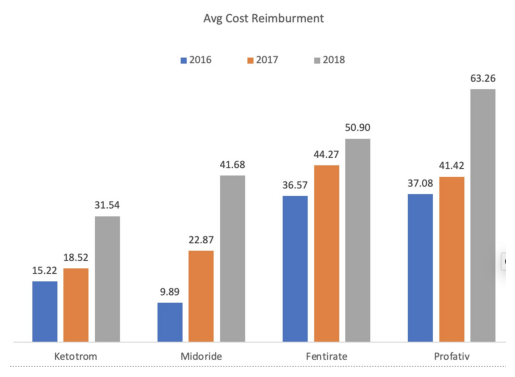

In [54]:
import matplotlib.image as mpimg

# Load the image using matplotlib.image.imread
img = mpimg.imread('/Users/nikunjpaghdar/Desktop/Screenshot 2023-12-21 at 15.14.55.png')

# Display the image using plt.imshow
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

#### Midoride's successful debut might be due to leverage and access of HCPS enjoyed by Ketotrom. ​

#### The company could pursue avenues to enhance the drug's affordability.​


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is imported

# Filter data for relevant products
relevant_products = ['J1885', 'J2250', 'J3010', 'J2704']
filtered_data = med_clm_pt_hcp_dig_df[med_clm_pt_hcp_dig_df['product_code'].isin(relevant_products)]

# Define product code names
product_names = {
    'J1885': 'Ketorolac Tromethamine',
    'J2250': 'Midazolam Hydrochloride',
    'J3010': 'Fentanyl Citrate',
    'J2704': 'Propofol'
}
# Replace product codes with product names
filtered_data['product_name'] = filtered_data['product_code'].map(product_names)

# Extract year from claim_date
filtered_data['year'] = pd.to_datetime(filtered_data['claim_date']).dt.year

# Group by product name, HCP (npi_id), and year
grouped_data = filtered_data.groupby(['product_name', 'npi_id', 'year'])

# Calculate the total number of claims and patients per writer (HCP) per year for each product
total_claims_per_year = grouped_data['claim_id'].nunique().reset_index()
total_patients_per_year = grouped_data['Patient_id'].nunique().reset_index()


/var/folders/y3/r7mxfvgn6ybc5cj3dtdm82jh0000gn/T/ipykernel_47146/1342101026.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['product_name'] = filtered_data['product_code'].map(product_names)
/var/folders/y3/r7mxfvgn6ybc5cj3dtdm82jh0000gn/T/ipykernel_47146/1342101026.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['year'] = pd.to_datetime(filtered_data['claim_date']).dt.year


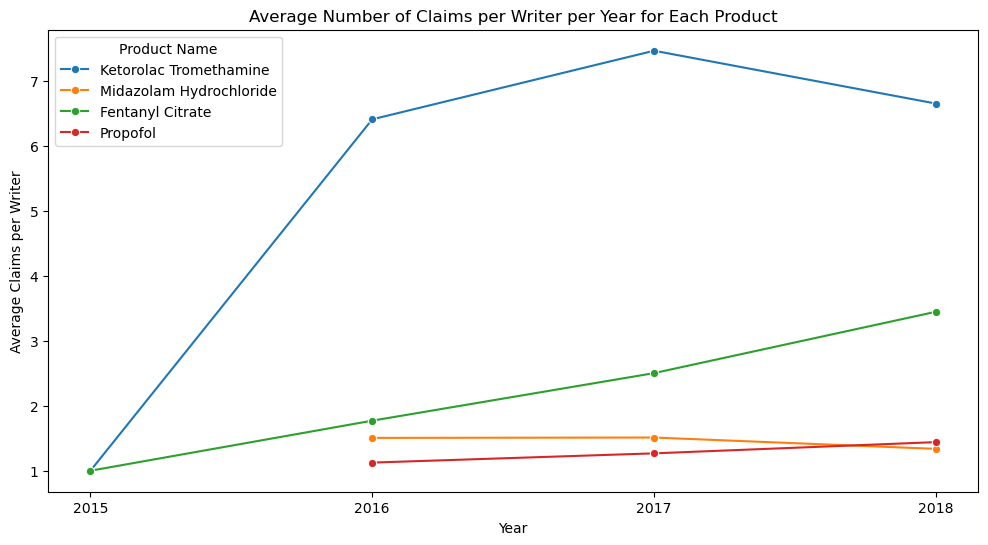

In [27]:
# Calculate the average number of claims and patients per writer (HCP) per year for each product
average_claims_per_year = grouped_data['claim_id'].nunique().groupby(['year', 'product_name']).mean().reset_index()
average_patients_per_year = grouped_data['Patient_id'].nunique().groupby(['year', 'product_name']).mean().reset_index()

# Reshape data for plotting
avg_claims_plot_data = average_claims_per_year.pivot_table(index='year', columns='product_name', values='claim_id').reset_index()
avg_patients_plot_data = average_patients_per_year.pivot_table(index='year', columns='product_name', values='Patient_id').reset_index()

# Function to plot the data with product names for average data
def plot_average_data(data, y_label, title):
    plt.figure(figsize=(12, 6))
    for product in product_names.values():
        if product in data.columns:
            sns.lineplot(data=data, x='year', y=product, marker='o', label=product)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(y_label)
    plt.legend(title='Product Name')
    plt.xticks(data['year'].unique())
    plt.show()

# 1. Plotting Average Claims per Writer per Year
plot_average_data(avg_claims_plot_data, 'Average Claims per Writer', 'Average Number of Claims per Writer per Year for Each Product')



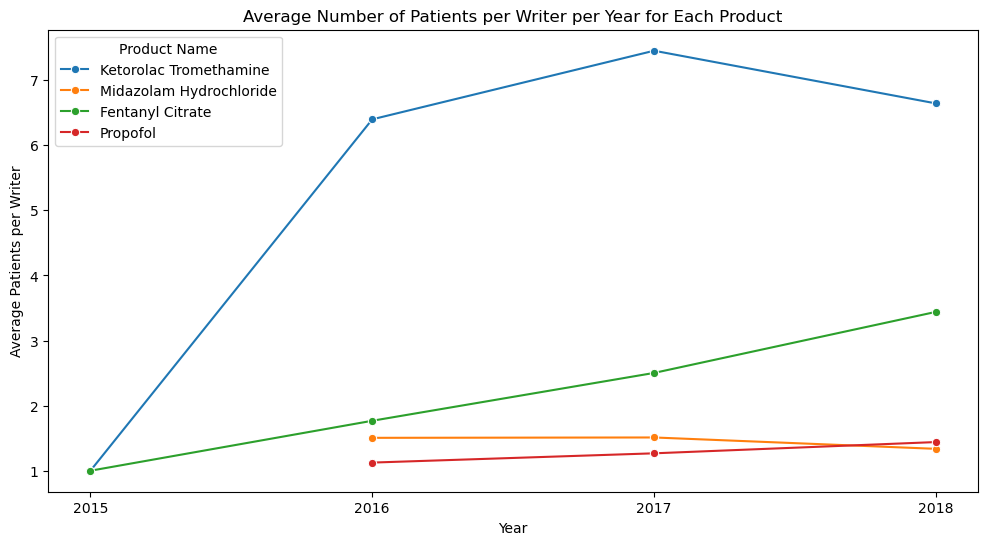

In [28]:
# 2. Plotting Average Patients per Writer per Year
plot_average_data(avg_patients_plot_data, 'Average Patients per Writer', 'Average Number of Patients per Writer per Year for Each Product')



### Insight

#### For Ketotrom, there's a noticeable decline in both claims per HCP and patients per HCP ​

#### Fentirate shows a steady increase in engagement​

#### Midoride, after its introduction, exhibits a decline in both metrics​


In [49]:
# Filter data for the specific product code (J2250) and relevant years (2017 and 2018)
product_code = 'J2250'
years = [2017, 2018]

filtered_data = med_clm_pt_hcp_dig_df[
    (med_clm_pt_hcp_dig_df['product_code'] == product_code) &
    (med_clm_pt_hcp_dig_df['claim_date'].dt.year.isin(years))
]

# Group the data by territory and year, count the number of claims for each territory in 2017 and 2018
grouped = filtered_data.groupby(['Territory Name', filtered_data['claim_date'].dt.year])
claims_volume = grouped.size().unstack()

# Calculate year-over-year percentage change in claims volume for each territory
claims_volume['YOY_percentage_change'] = ((claims_volume[2018] - claims_volume[2017]) / claims_volume[2017]) * 100

top_5_negative_territories = claims_volume['YOY_percentage_change'].nsmallest(5)

print("Top 5 territories with the most negative year-over-year percentage change in claims volume for Product Code J2250:")
print(top_5_negative_territories)


Top 5 territories with the most negative year-over-year percentage change in claims volume for Product Code J2250:
Territory Name
St Louis, MO       -72.727273
Phoenix, AZ        -70.000000
LA-San Diego, CA   -57.894737
New York, NY       -57.500000
Minneapolis, MN    -53.333333
Name: YOY_percentage_change, dtype: float64


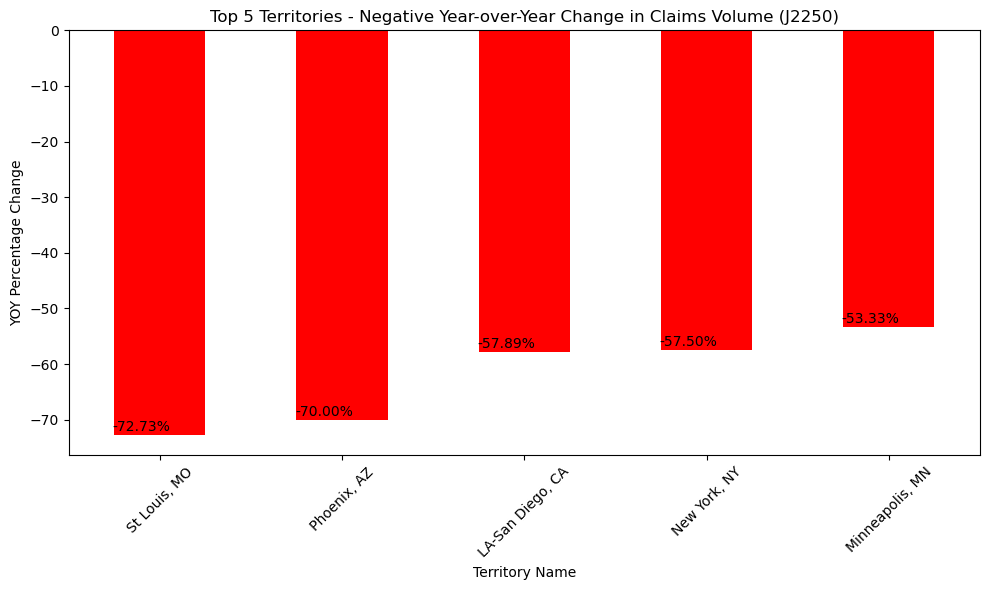

In [51]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = top_5_negative_territories.plot(kind='bar', color='red')

# Adding data labels to the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.2,
             f'{bar.get_height():.2f}%', ha='center', va='bottom')

plt.title('Top 5 Territories - Negative Year-over-Year Change in Claims Volume (J2250)')
plt.xlabel('Territory Name')
plt.ylabel('YOY Percentage Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insight

#### The territory with the most significant year-over-year decrease is St Louis, MO, with a 72% drop in claims. ​
#### Overall, the data indicates a widespread decline in Midoride's market penetration across several key territories.​

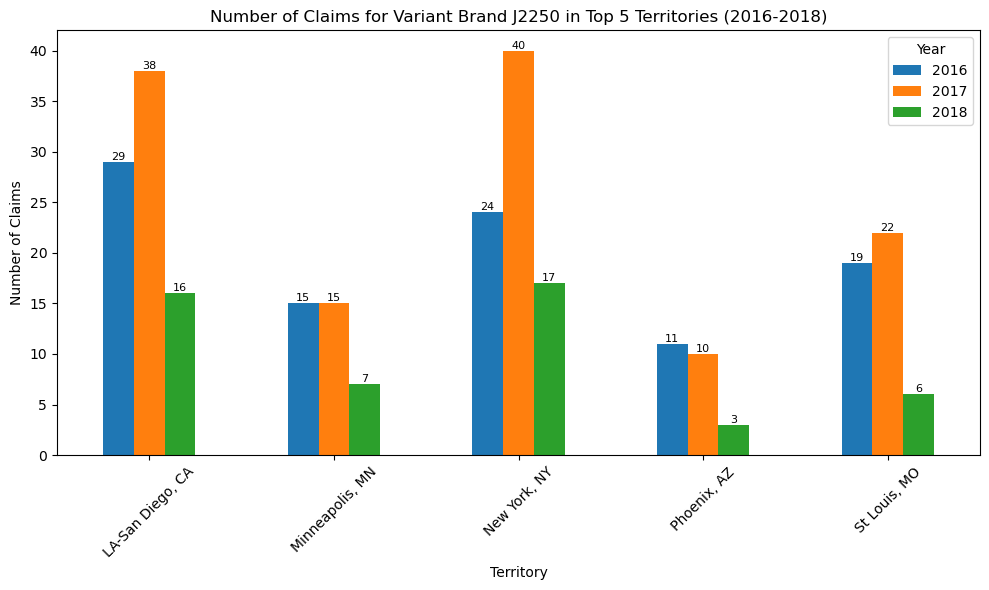

In [30]:
# Filter the data for the top 5 territories
top_5_territories = ['St Louis, MO', 'Phoenix, AZ', 'LA-San Diego, CA', 'New York, NY', 'Minneapolis, MN']
filtered_data = med_clm_pt_hcp_dig_df[
    (med_clm_pt_hcp_dig_df['product_code'] == 'J2250') &
    (med_clm_pt_hcp_dig_df['Territory Name'].isin(top_5_territories)) &
    (med_clm_pt_hcp_dig_df['claim_date'].dt.year.isin([2016, 2017, 2018]))
]

# Group data by territory and year, and count the number of claims
grouped_data = filtered_data.groupby(['Territory Name', filtered_data['claim_date'].dt.year])['claim_id'].count().unstack()

# Plotting clustered bar chart with data labels
ax = grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Claims for Variant Brand J2250 in Top 5 Territories (2016-2018)')
plt.xlabel('Territory')
plt.ylabel('Number of Claims')
plt.legend(title='Year')
plt.xticks(rotation=45)

# Add data labels for each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### Insight

#### The most substantial year-over-year decrease in percentage was observed in St. Louis; however, in terms of claim count, New York experienced the most significant decline, with a reduction of 23 claims.

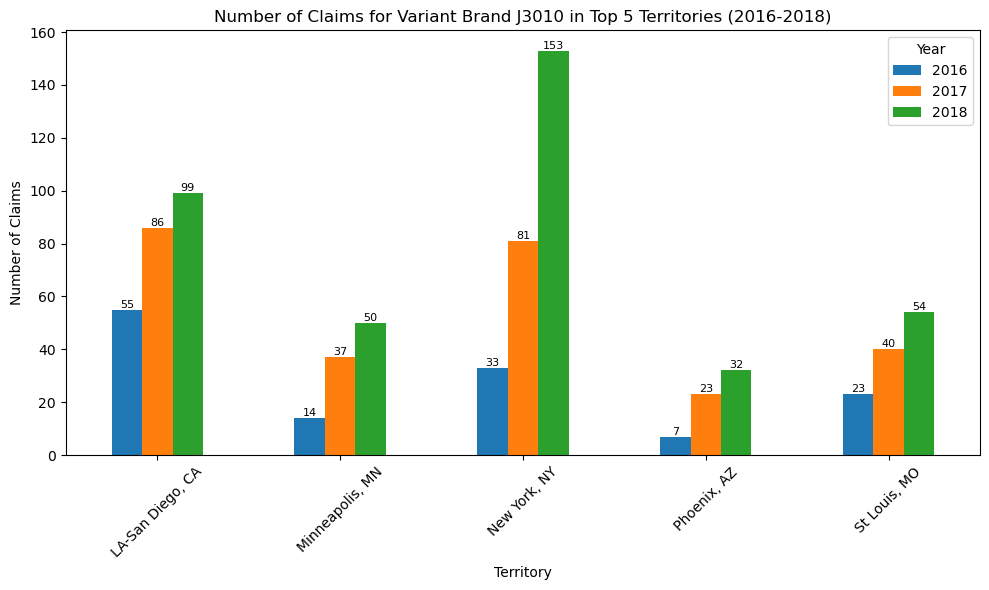

In [31]:
# Filter the data for the top 5 territories
top_5_territories = ['St Louis, MO', 'Phoenix, AZ', 'LA-San Diego, CA', 'New York, NY', 'Minneapolis, MN']
filtered_data = med_clm_pt_hcp_dig_df[
    (med_clm_pt_hcp_dig_df['product_code'] == 'J3010') &
    (med_clm_pt_hcp_dig_df['Territory Name'].isin(top_5_territories)) &
    (med_clm_pt_hcp_dig_df['claim_date'].dt.year.isin([2016, 2017, 2018]))
]

# Group data by territory and year, and count the number of claims
grouped_data = filtered_data.groupby(['Territory Name', filtered_data['claim_date'].dt.year])['claim_id'].count().unstack()

# Plotting clustered bar chart with data labels
ax = grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Claims for Variant Brand J3010 in Top 5 Territories (2016-2018)')
plt.xlabel('Territory')
plt.ylabel('Number of Claims')
plt.legend(title='Year')
plt.xticks(rotation=45)

# Add data labels for each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### Insight

#### Competitor brand has shown tremendous growth in each territory, In contrast to Variant Brand it has increased no. of claim count for New York to almost double.


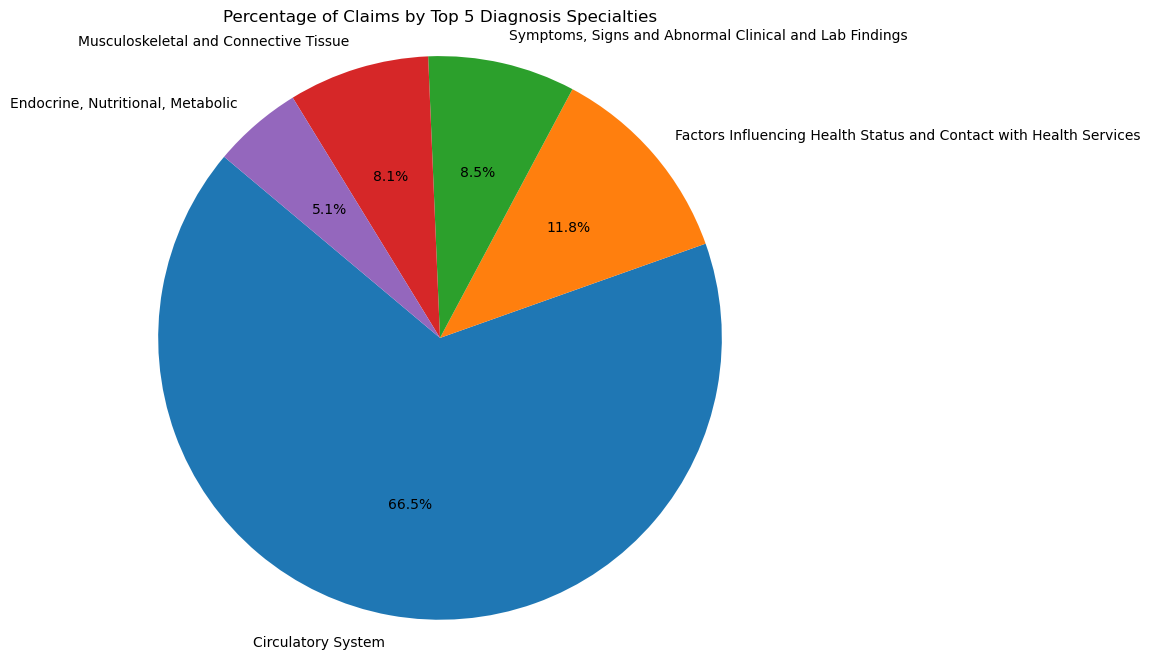

In [32]:
specialty_counts = med_clm_pt_hcp_dig_df['speciality_diagnosis_code'].value_counts(normalize=True) * 100

# Select the top 5 diagnosis specialties
top_5_specialties = specialty_counts.head(5)

# Plotting a pie chart for the top 5 diagnosis specialties
plt.figure(figsize=(8, 8))
plt.pie(top_5_specialties, labels=top_5_specialties.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Claims by Top 5 Diagnosis Specialties')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Insight

#### 80% of anesthesia claims are concentrated in the top five diagnosis specialties.​
#### The circulatory system accounts for nearly half of these claims, indicating a primary focus area.​

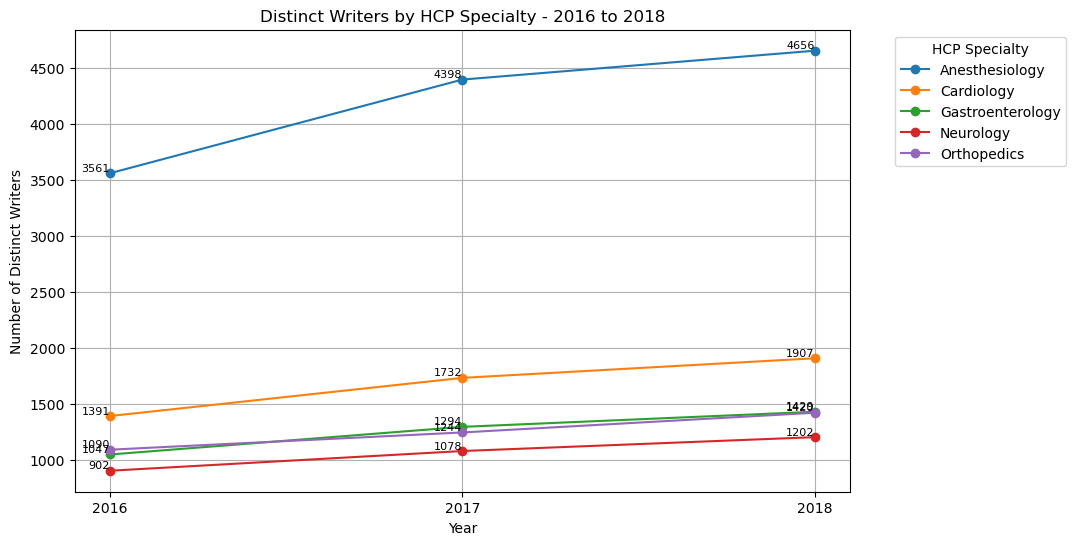

In [33]:
# List of years
years = [2016, 2017, 2018]

# Create an empty DataFrame to store the counts for each specialty across years
specialty_writer_counts = pd.DataFrame()

# Loop through each year and calculate counts for each specialty
for year in years:
    # Filter data for the specific year
    year_data = med_clm_pt_hcp_dig_df[med_clm_pt_hcp_dig_df['claim_date'].dt.year == year]
    
    # Grouping data by HCP specialty and counting distinct writers without nunique
    hcp_specialty_writer_count = year_data.groupby('speciality_hcp')['npi_id'].count()
    
    # Append the counts for the current year to the DataFrame
    specialty_writer_counts[year] = hcp_specialty_writer_count

# Transpose the DataFrame to make specialties as columns for plotting
specialty_writer_counts = specialty_writer_counts.T

# Plotting a line graph for each specialty
plt.figure(figsize=(10, 6))
for specialty in specialty_writer_counts.columns:
    plt.plot(specialty_writer_counts.index, specialty_writer_counts[specialty], marker='o', label=specialty)

    # Add data labels for each point
    for x, y in zip(specialty_writer_counts.index, specialty_writer_counts[specialty]):
        plt.text(x, y, f'{y}', ha='right', va='bottom', fontsize=8, color='black')

plt.title('Distinct Writers by HCP Specialty - 2016 to 2018')
plt.xlabel('Year')
plt.ylabel('Number of Distinct Writers')
plt.legend(title='HCP Specialty', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(years)
plt.grid(True)
plt.show()



### Insight

#### 1. Given Antithesis should be administered by specialist, almost 50% of  claims are prescribed by HCP with specialty in subject.

#### 2. Other specialist having lower number of claims suggest that those are for surgeries.

/var/folders/y3/r7mxfvgn6ybc5cj3dtdm82jh0000gn/T/ipykernel_47146/2878019002.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_year['age_group'] = pd.cut(filtered_data_year['Age'], bins=age_bins, labels=age_labels)


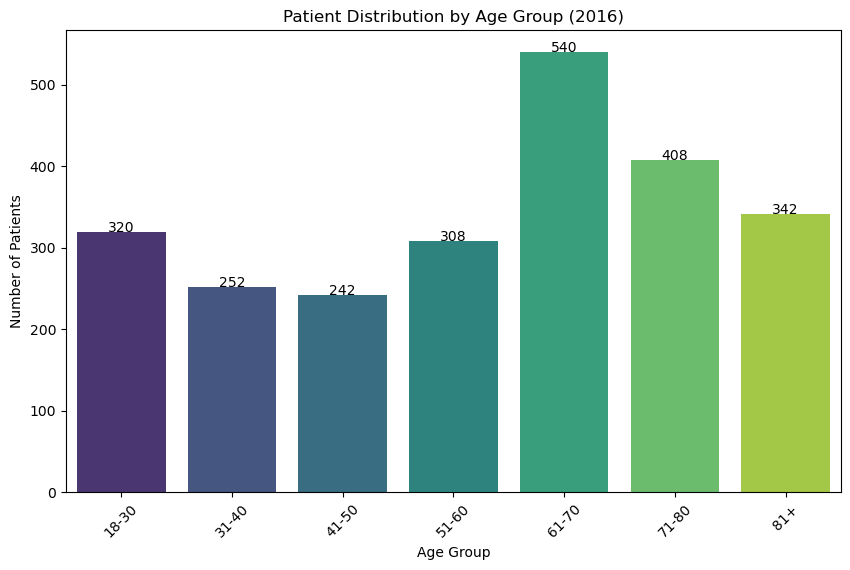

/var/folders/y3/r7mxfvgn6ybc5cj3dtdm82jh0000gn/T/ipykernel_47146/2878019002.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_year['age_group'] = pd.cut(filtered_data_year['Age'], bins=age_bins, labels=age_labels)


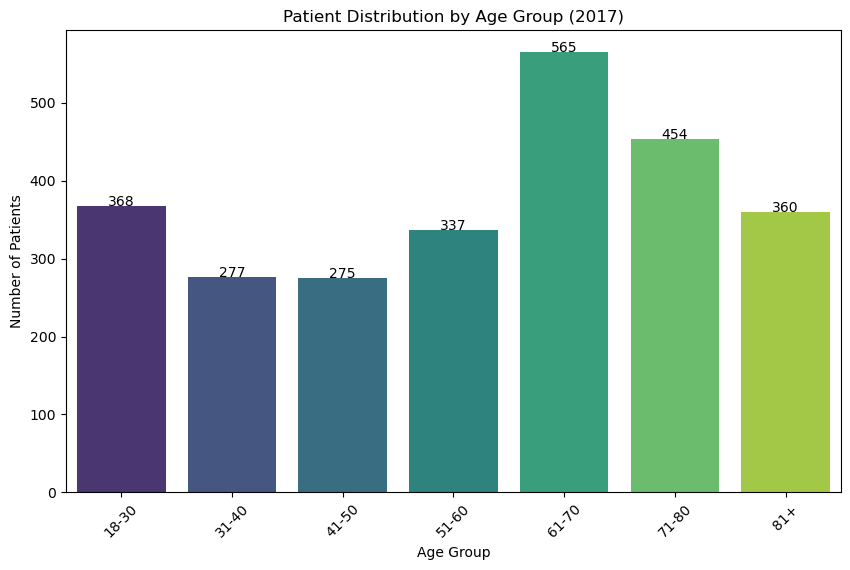

/var/folders/y3/r7mxfvgn6ybc5cj3dtdm82jh0000gn/T/ipykernel_47146/2878019002.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_year['age_group'] = pd.cut(filtered_data_year['Age'], bins=age_bins, labels=age_labels)


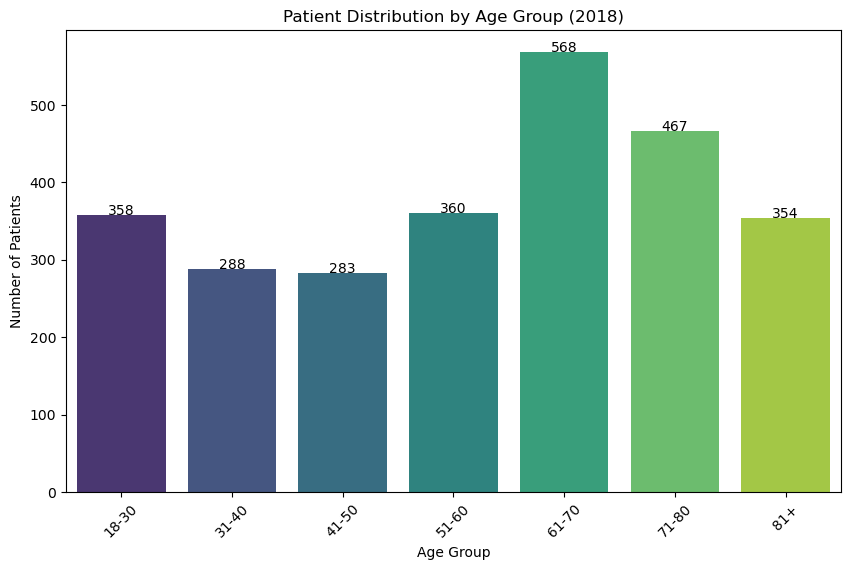

In [34]:
for year in years:
    # Filter data for the specific year
    filtered_data_year = med_clm_pt_hcp_dig_df[
        (med_clm_pt_hcp_dig_df['product_code'].isin(relevant_products)) &
        (med_clm_pt_hcp_dig_df['claim_date'].dt.year == year)
    ]
    
    # Define age bins
    age_bins = [18, 31, 41, 51, 61, 71, 81, float('inf')]
    age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
    
    # Bin patient ages into age groups
    filtered_data_year['age_group'] = pd.cut(filtered_data_year['Age'], bins=age_bins, labels=age_labels)
    
    # Group data by age group, count unique patients
    grouped_data = filtered_data_year.groupby('age_group')['Patient_id'].nunique().reset_index(name='Number of Patients')
    
    # Plotting clustered bar chart for each year
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=grouped_data, x='age_group', y='Number of Patients', palette='viridis')
    plt.title(f'Patient Distribution by Age Group ({year})')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Patients')
    plt.xticks(rotation=45)
    
    # Adding data labels to the bars
    for index, row in grouped_data.iterrows():
        ax.text(index, row['Number of Patients'], row['Number of Patients'], color='black', ha="center")
    
    plt.show()

### Insight

#### Anesthesia claims are mostly from patients aged 60 and above, making up 53% of total claims.​

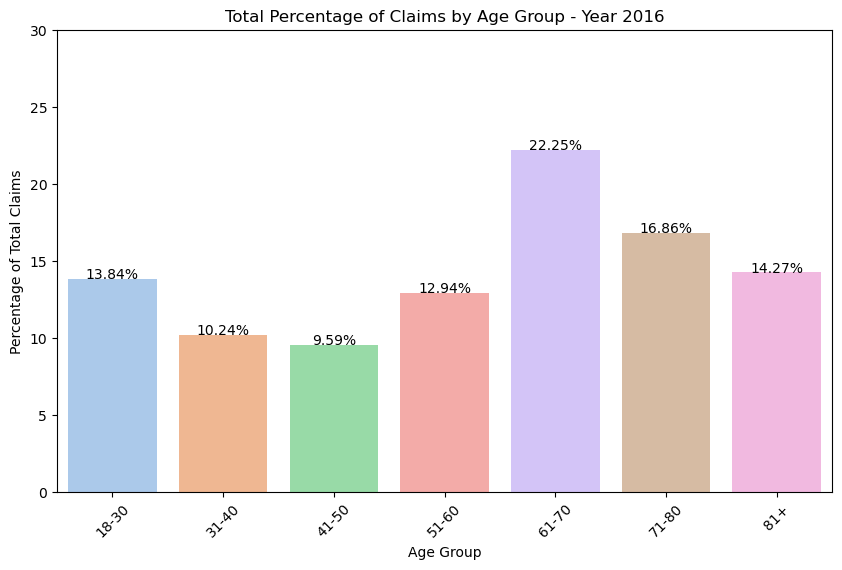

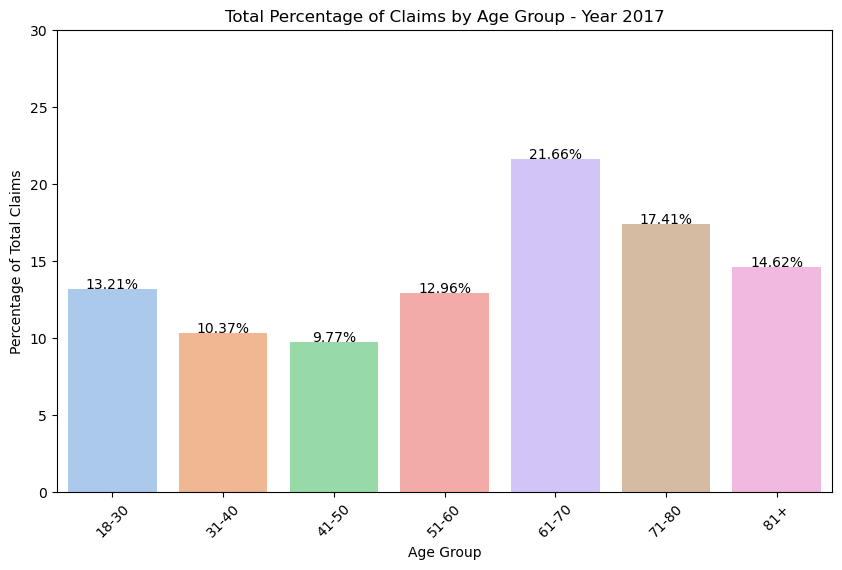

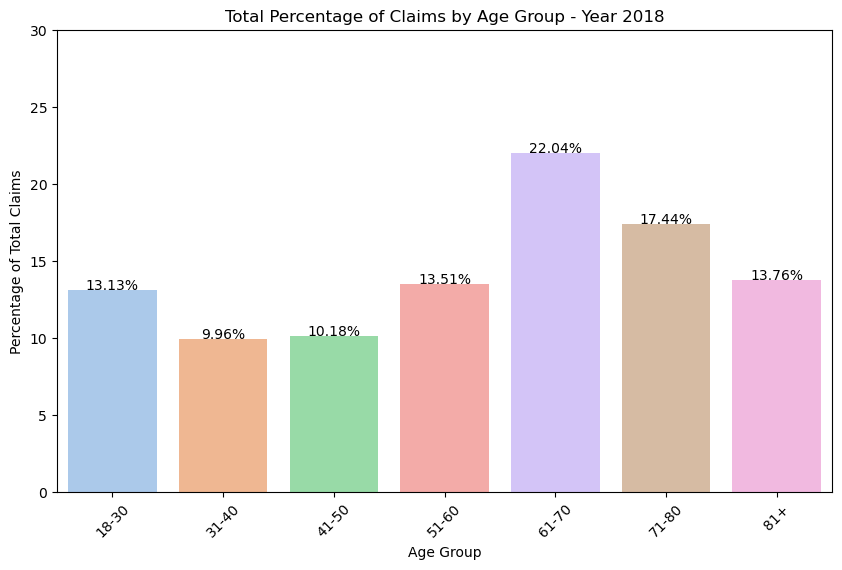

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

med_clm_pt_hcp_dig_df['age_group'] = pd.cut(med_clm_pt_hcp_dig_df['Age'], bins=age_bins, labels=age_labels)
colors = sns.color_palette('pastel')

for year in [2016, 2017, 2018]:
    year_data = med_clm_pt_hcp_dig_df[med_clm_pt_hcp_dig_df['claim_date'].dt.year == year]
    filtered_data = year_data[year_data['product_code'].isin(relevant_products)]
    
    grouped_data = filtered_data.groupby('age_group')['claim_id'].nunique().reset_index(name='Number of Claims')
    total_claims = grouped_data['Number of Claims'].sum()
    grouped_data['Percentage'] = (grouped_data['Number of Claims'] / total_claims) * 100
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=grouped_data, x='age_group', y='Percentage', palette=colors)
    plt.title(f'Total Percentage of Claims by Age Group - Year {year}')
    plt.xlabel('Age Group')
    plt.ylabel('Percentage of Total Claims')
    plt.xticks(rotation=45)
    plt.ylim(0, 30)
    
    # Adding data labels to the bars
    for index, row in grouped_data.iterrows():
        ax.text(index, row['Percentage'], f"{row['Percentage']:.2f}%", color='black', ha="center")
    
    plt.show()


### Insight

#### Minimal growth in all age groups annually, signalling a steady but not growing market in terms of age demographics.​

​

In [36]:
# Convert 'claim_date' to datetime
med_clm_pt_hcp_dig_df['claim_date'] = pd.to_datetime(med_clm_pt_hcp_dig_df['claim_date'])

# Extract year from 'claim_date'
med_clm_pt_hcp_dig_df['year'] = med_clm_pt_hcp_dig_df['claim_date'].dt.year

# Create 'id2' column by merging 'npi_id' and 'product_code'
med_clm_pt_hcp_dig_df['id2'] = med_clm_pt_hcp_dig_df['npi_id'].astype(str) + '_' + med_clm_pt_hcp_dig_df['product_code']
med_clm_pt_hcp_dig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28368 entries, 0 to 28367
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   claim_id                   28368 non-null  int64         
 1   Patient_id                 28368 non-null  int64         
 2   npi_id                     28368 non-null  float64       
 3   claim_date                 28368 non-null  datetime64[ns]
 4   diagnosis_code             28368 non-null  object        
 5   product_code               28269 non-null  object        
 6   Age                        28368 non-null  int64         
 7   Gender                     28368 non-null  object        
 8   Address                    28368 non-null  object        
 9   City                       28368 non-null  object        
 10  State                      28368 non-null  object        
 11  Zip Code                   28368 non-null  object        
 12  spec

In [37]:
print(med_clm_pt_hcp_dig_df.columns)

Index(['claim_id', 'Patient_id', 'npi_id', 'claim_date', 'diagnosis_code',
       'product_code', 'Age', 'Gender', 'Address', 'City', 'State', 'Zip Code',
       'speciality_hcp', 'Territory Name', 'Region Name',
       'diagnosis_code_initials', 'speciality_diagnosis_code', 'age_group',
       'year', 'id2'],
      dtype='object')


In [38]:
missing_product_code = med_clm_pt_hcp_dig_df['product_code'].isnull().sum()
print("Number of missing values in 'product_code' column:", missing_product_code)


Number of missing values in 'product_code' column: 99


In [39]:
# Convert claim_date to a year column for easier manipulation
med_clm_pt_hcp_dig_df['year'] = med_clm_pt_hcp_dig_df['claim_date'].dt.year

# Create a copy of the DataFrame for manipulation
df = med_clm_pt_hcp_dig_df.copy()

# Filter data for product code "J2250"
df_j2250 = df[df['product_code'] == 'J2250']

# Create a pivot table to count prescribers for each year
pivot = df_j2250.pivot_table(index='id2', columns='year', values='claim_id', aggfunc='count', fill_value=0)

# Create a new column to identify if prescriber wrote prescriptions for "J2250" in the previous year
for col in pivot.columns[1:]:
    pivot[f'New_Prescriber_{col}'] = (pivot[col] > 0) & (pivot[col - 1] == 0)

# Count the total new prescribers for each year
new_prescribers_count = pivot.filter(like='New_Prescriber').sum()

print(new_prescribers_count)

year
New_Prescriber_2017    111
New_Prescriber_2018     98
dtype: int64


In [40]:
# Convert claim_date to a year column for easier manipulation
med_clm_pt_hcp_dig_df['year'] = med_clm_pt_hcp_dig_df['claim_date'].dt.year

# Create a copy of the DataFrame for manipulation
df = med_clm_pt_hcp_dig_df.copy()

# List of product codes to analyze
product_codes = ["J1885", "J2250", "J3010", "J2704"]

# Create an empty dictionary to store pivot tables for each product code
pivot_dict = {}

for product_code in product_codes:
    # Filter data for the current product code
    df_product = df[df['product_code'] == product_code]

    # Create a pivot table to count prescribers for each year
    pivot = df_product.pivot_table(index='id2', columns='year', values='claim_id', aggfunc='count', fill_value=0)

    # Create a new column to identify if prescriber wrote prescriptions for the product in the previous year
    for col in pivot.columns[1:]:
        pivot[f'New_Prescriber_{col}'] = (pivot[col] > 0) & (pivot[col - 1] == 0)

    # Store the pivot table for the current product code in the dictionary
    pivot_dict[product_code] = pivot

# Count the total new prescribers for each product code and each year
new_prescribers_count = pd.DataFrame(index=product_codes, columns=pivot.columns)

for product_code, pivot in pivot_dict.items():
    new_prescribers_count.loc[product_code] = pivot.filter(like='New_Prescriber').sum()

print(new_prescribers_count)


year  2016 2017 2018 New_Prescriber_2017 New_Prescriber_2018
J1885  NaN  NaN  NaN                 7.0                 4.0
J2250  NaN  NaN  NaN               111.0                98.0
J3010  NaN  NaN  NaN               119.0                75.0
J2704  NaN  NaN  NaN               152.0               165.0


In [41]:
import pandas as pd

# Assuming med_clm_pt_hcp_dig_df is your DataFrame

# Convert claim_date to a year column for easier manipulation
med_clm_pt_hcp_dig_df['year'] = med_clm_pt_hcp_dig_df['claim_date'].dt.year

# Create a copy of the DataFrame for manipulation
df = med_clm_pt_hcp_dig_df.copy()

# List of product codes to analyze
product_codes = ["J1885", "J2250", "J3010", "J2704"]

# Create an empty dictionary to store pivot tables for each product code
pivot_dict = {}

for product_code in product_codes:
    # Filter data for the current product code
    df_product = df[df['product_code'] == product_code]

    # Create a pivot table to count prescribers for each year
    pivot = df_product.pivot_table(index='id2', columns='year', values='claim_id', aggfunc='count', fill_value=0)

    # Create a new column to identify if prescriber wrote prescriptions for the product in the previous year
    for col in pivot.columns[1:]:
        pivot[f'New_Prescriber_{col}'] = (pivot[col] > 0) & (pivot[col - 1] == 0)

    # Store the pivot table for the current product code in the dictionary
    pivot_dict[product_code] = pivot

# Count the total new prescribers for each product code and each year
new_prescribers_count = pd.DataFrame(index=product_codes)

for product_code, pivot in pivot_dict.items():
    # Filter columns with non-NaN values
    valid_columns = pivot.columns[pivot.notna().any()]
    pivot = pivot[valid_columns]
    new_prescribers_count = pd.concat([new_prescribers_count, pivot.filter(like='New_Prescriber').sum().rename(product_code)], axis=1)

# Drop columns with all NaN values
new_prescribers_count = new_prescribers_count.dropna(axis=1, how='all')

new_prescribers_count = new_prescribers_count.iloc[4:]

print(new_prescribers_count)
    



                     J1885  J2250  J3010  J2704
New_Prescriber_2016  487.0    NaN  343.0    NaN
New_Prescriber_2017    7.0  111.0  119.0  152.0
New_Prescriber_2018    4.0   98.0   75.0  165.0


#### As J2250 and J2704 doesnt have any prescriber in year 2015 its not showing unique count of npi in 2016.

In [42]:
# Filter data for the year 2016 and the specific product codes
df_2016 = med_clm_pt_hcp_dig_df[(med_clm_pt_hcp_dig_df['year'] == 2016) & (med_clm_pt_hcp_dig_df['product_code'].isin(['J2250', 'J2704']))]

# Count unique npi_id for each product code
unique_counts = df_2016.groupby('product_code')['npi_id'].nunique()

print(unique_counts)


product_code
J2250    285
J2704     72
Name: npi_id, dtype: int64


In [43]:
# Your existing DataFrame
data = {
    'J1885': [487.0, 7.0, 4.0],
    'J2250': [285.0, 111.0, 98.0],
    'J3010': [343.0, 119.0, 75.0],
    'J2704': [72.0, 152.0, 165.0]
}

index = ['2016', '2017', '2018']

new_prescribers_count = pd.DataFrame(data, index=index)

# Name the index and column
new_prescribers_count.index.name = 'year'
new_prescribers_count.columns.name = 'product_code'

print(new_prescribers_count)

product_code  J1885  J2250  J3010  J2704
year                                    
2016          487.0  285.0  343.0   72.0
2017            7.0  111.0  119.0  152.0
2018            4.0   98.0   75.0  165.0


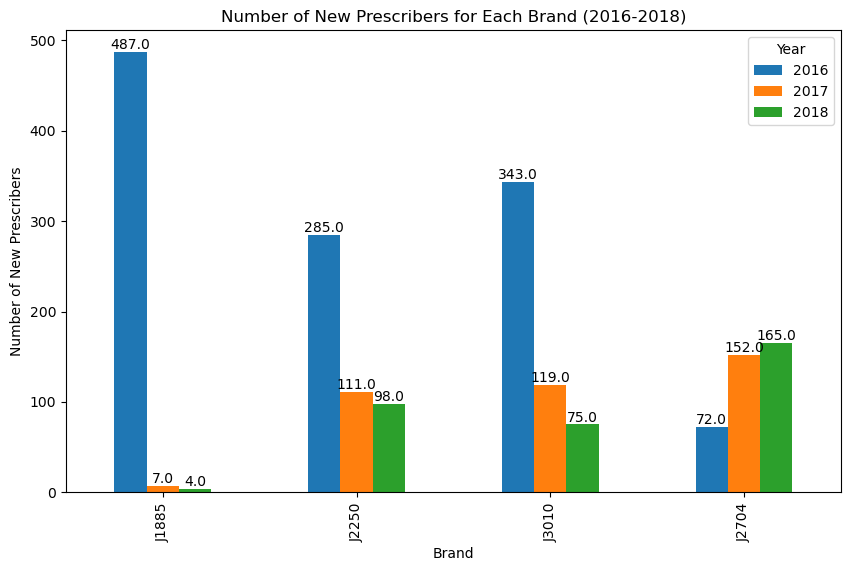

In [44]:
# Plotting the clustered bar chart
ax = new_prescribers_count.T.plot(kind='bar', figsize=(10, 6))
plt.title('Number of New Prescribers for Each Brand (2016-2018)')
plt.xlabel('Brand')
plt.ylabel('Number of New Prescribers')
plt.legend(title='Year')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

### Insight

#### Fentirate had the highest new HCP acquisition in 2016 but saw a significant drop in subsequent years.​

#### Ketotrom, despite fewer initial new HCPs, showed consistent growth in acquisition.​

#### Profative's new HCP acquisition is minimal and now declining.​

#### Midoride displayed initial growth in new HCP acquisition which is also now declining.​


In [45]:
# List of product codes to filter
product_codes = ["J1885", "J2250", "J2704", "J3010"]

# Filtering the DataFrame for the specified product codes
filtered_df = med_clm_pt_hcp_dig_df[med_clm_pt_hcp_dig_df['product_code'].isin(product_codes)]

# Grouping by year and product_code, then counting unique npi_id for each group
result_df = filtered_df.groupby(['year', 'product_code'])['npi_id'].nunique().reset_index()

# Creating a pivot table to display unique npi_id count for each product for each year
pivot_result = result_df.pivot_table(index='year', columns='product_code', values='npi_id', fill_value=0)

pivot_result = pivot_result.iloc[1:]

print(pivot_result)

product_code  J1885  J2250  J2704  J3010
year                                    
2016            492    285     72    344
2017            495    276    187    416
2018            496    226    268    468


In [46]:
data = {
    'J1885': [5, 488, 492],
    'J2250': [0, 165, 128],
    'J2704': [0, 35, 103],
    'J3010': [1, 297, 393]
}

index = ['2016', '2017', '2018']

continued_hcp = pd.DataFrame(data, index=index)
print(continued_hcp)

      J1885  J2250  J2704  J3010
2016      5      0      0      1
2017    488    165     35    297
2018    492    128    103    393


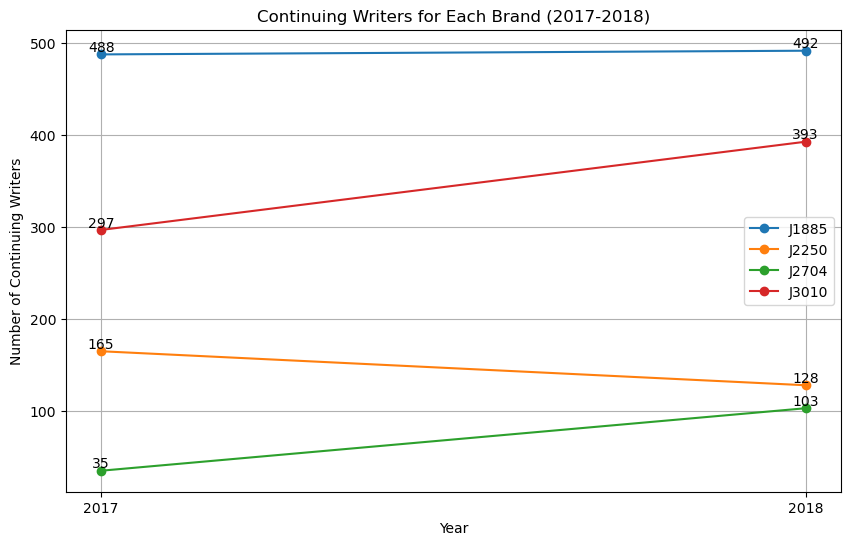

In [47]:
# Extracting data for 2017 and 2018
data_2017_2018 = continued_hcp.loc['2017':'2018']

# Plotting the line chart with data labels
plt.figure(figsize=(10, 6))
for column in data_2017_2018.columns:
    plt.plot(data_2017_2018.index, data_2017_2018[column], marker='o', label=column)
    for x, y in zip(data_2017_2018.index, data_2017_2018[column]):
        label = "{:.0f}".format(y)  # Format the label to an integer
        plt.text(x, y, label, ha='center', va='bottom')

plt.title('Continuing Writers for Each Brand (2017-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Continuing Writers')
plt.legend()
plt.grid(True)
plt.show()

### Insight

#### Fentirate being main competitor brand, though declining new HCP acquisition, it’s able to sustain already gained HCPs and that number is steadily growing.

# ## Recommendation

### HCP Engagement:

### Sales Team:

#### 1. Performance-based Incentives tied to the successful transition from Ketotrom to Medoride. ​

#### 2. Strengthen Midoride in declining regions by directing sales teams to circulatory specialty accounts (Northeast/Southwest) and focusing on anesthesiologists.​

#### 3. Allocate additional resources in Fentirate-challenged territories (NY, Orlando, Boston, DC) by targeting anesthesiologist-specialized HCPs to counter competitive growth."​

#### 4. If needed to revisit,  training for Sales Reps focusing on the unique selling propositions (USPs) and benefits of Midoride over its competitors. ​

#### 5. Formulary Wins: Clinical Evidence Enhancement and Collaborate with healthcare providers and payers to understand the specific needs or hurdles preventing formulary inclusion.​

#### 6. Leverage the success of Ketotrom's HCP engagement to derive strategies that can be applicable to Midoride.​


### HCP Engagement:​

​

### Marketing Team:​

​

#### 1. Strengthen relationships with HCPs who have continued prescribing our products by providing updated information, training sessions, and incentives.​

#### 2. Seminar & Webinar: Organize both live and virtual seminars and workshops targeting anaesthesiologists in Northeast and southeast region. These events can feature respected KOLs discussing clinical benefits, safety, and comparative advantages of Midoride.​

#### 3. Peer To Peer Forum: Create online communities where anaesthesiologists can engage with peers and experts, discussing best practices and experiences with our product.​

#### 4. Establish channels for HCPs to provide feedback, ask questions, or seek support regarding the medication or its usage.​

#### 5. Use targeted ads, emails, or direct mail to provide updates on medication, clinical studies, and product information directly to HCPs.​

### Patient Engagement:


### Marketing Team:

#### 1. Digital Platforms: Leverage social media platforms like Instagram and YouTube for the 18-30 age group. Use engaging content formats like short videos and stories to communicate benefits effectively.​

#### 2. Partner with health and wellness websites, forums, or apps frequented by the 51-60 and 80+ age groups. Publish articles, host webinars, and offer informative content catering to their specific health concerns in territories – New York, Boston, Washington and Orlando. Use traditional channel like Newspaper, mail to reach out to maximum audience.​

#### 3. Patient Assistance Programs: Provide financial assistance through copay cards, or patient support programs to help with affordability or access to medication.​

# Data Exploration Opportunities​

### Additional data items:​


#### 1. Detailed information on the pricing, insurance coverage, and reimbursement levels for each drug ​

#### 2. Surveys or studies on physician and patient preferences, reasons for drug selection, and satisfaction with the treatment 

#### 3. Sales Reps deployment demographics for each territory​


### Additional Analysis:​

#### 1. Affordability Index: Combine pricing data with insurance coverage to understand patient out-of-pocket costs, potentially correlating with prescription volumes.​

#### 2. Preference Mapping: Map out physician and patient preferences to identify key factors influencing drug choice, such as efficacy, side effects, dosing convenience, Mode of administration and brand trust.​

#### 3. Physician Segmentation: Segment physicians based on prescribing habits, preferences, patient demographics, and responsiveness to drug efficacy or cost-effectiveness.​